# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie II : Regréssion Polynomiale**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [2]:
import pandas as pd
dataset = pd.read_csv("data.csv") # Lire les données depuis le fichier CSV "data.csv" et les charge dans un DataFrame
dataset.head() # Afficher les 5 premières lignes du DataFrame

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Wheight) et appelez cette variable X.

In [3]:
x = dataset[['Volume', 'Weight']]

### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [4]:
y = dataset['CO2']

### **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### **Question 5**

5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :


In [6]:
lr.fit(x, y) # Entraîne le modèle de régression linéaire

LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [7]:
lr.predict([[1300, 2300]]) # Prédire le les grammes de CO2 en se basant sur ses caractéristiques

/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.2087328])

### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.

Exemple : si x est une variable, alors 2x vaut x deux fois. x est la variable inconnue et le chiffre 2 est le coefficient.

Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [8]:
coefs = lr.coef_

for i, coef in enumerate(coefs):
    print("Coefficient ", x.columns[i], ":", coef)

Coefficient  Volume : 0.007805257527747124
Coefficient  Weight : 0.0075509472703006895


# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [16]:
x, y = make_regression(n_samples=100, n_features=1, n_targets=1)  # Générer des données aléatoires pour x et y
y = y**2  # Transformer les valeurs cibles y en carré de leurs valeurs actuelles
poly = PolynomialFeatures(degree=2, include_bias=False)  # Créer un transformateur de caractéristiques pour générer des caractéristiques polynomiales jusqu'au degré 2
x = poly.fit_transform(x)  # Transformer les caractéristiques d'entrée x en caractéristiques polynomiales jusqu'au degré 2

### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

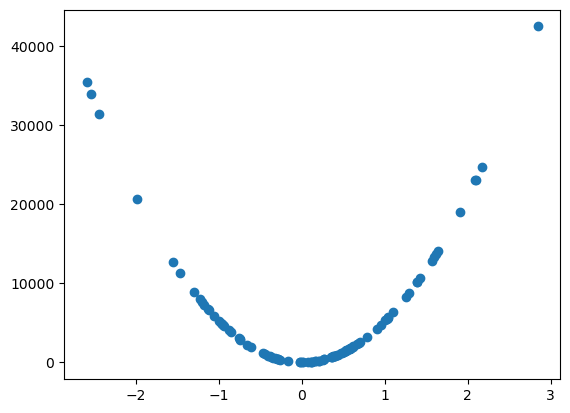

In [17]:
plt.scatter(x[:, 0], y) # Crée un nuage de points pour visualiser les données

### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [20]:
sgd_regressor = SGDRegressor(max_iter=100, alpha=0.0001)

### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [21]:
sgd_regressor.fit(x, y) # Entraîner le modèle 

/usr/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [22]:
sgd_regressor.score(x, y) # Évaluer la précision du modèle

0.9999999964717476

### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

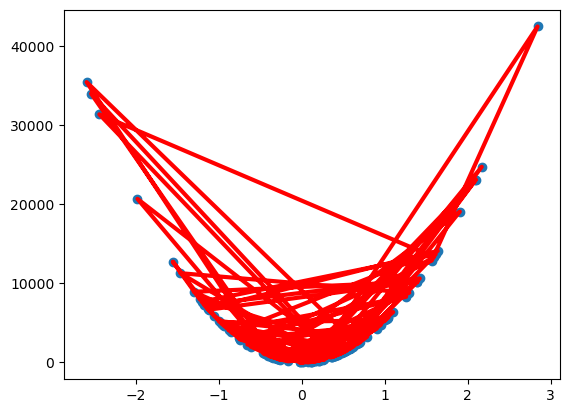

In [23]:
predict = sgd_regressor.predict(x) # Prédire les valeurs cibles

plt.scatter(x[:, 0], y) # Crée un nuage de points pour visualiser les données
plt.plot(x[:, 0], predict, c='red', lw=3) # Tracer le graphique des valeurs prédites

### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

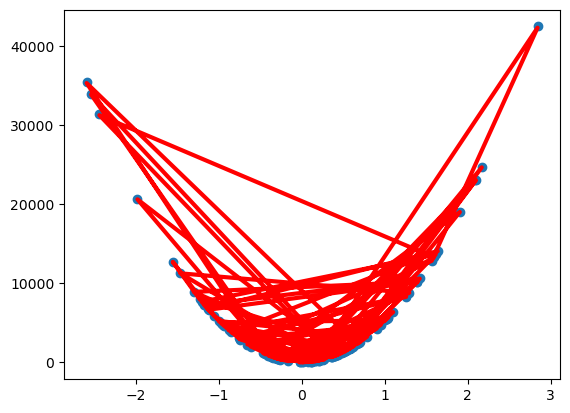

In [30]:
sgd_regressor = SGDRegressor(max_iter=1000, alpha=0.01)
sgd_regressor.fit(x, y) # Entraîner le modèle
predict = sgd_regressor.predict(x) # Prédire les valeurs cibles

plt.scatter(x[:, 0], y) # Crée un nuage de points pour visualiser les données
plt.plot(x[:, 0], predict, c='red', lw=3) # Tracer le graphique des valeurs prédites